# **Chennai Water Storage Manager**
------
*Notebook for TARP project collaborated by Senthil Kumar and Somya Sheti*


## **STEP ZERO: IMPORT LIBRARIES AND MINE DATA**
-------


- Import necessary libraries
- Web-scrap data

Data is available from 1st January 2004 till today. The data is mined by a web-scraper bot. On an average, it takes 1 second per date-scrapping 

In [7]:
!pip install fbprophet
import tensorflow as tf
import pandas as pd
import numpy as np
from keras import layers
from keras import optimizers
import io
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers
print('necessary libraries imported')

necessary libraries imported


In [ ]:
# Mining data from the website


# Writing to an excel  
# sheet using Python 
import xlwt 
from xlwt import Workbook 
  
# Workbook is created 
wb = Workbook() 
  
# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Main_sheet') 
  
sheet1.write(0, 0, 'Date')
sheet1.write(0, 1, 'nth day in year')
 
sheet1.write(0, 2, 'Storage (mcft)') 
sheet1.write(0, 3, 'Inflow (cusecs)') 
sheet1.write(0, 4, 'Rainfall (mm)') 
sheet1.write(0, 5, 'Outflow (cusecs)')
sheet1.write(0,6, 'Reservoir')
 
required_td=[14,15,17,16,23,24,26,25,32,33,35,34,50,51,53,52]
content=''
controller=1
 
import requests
#with open('C:\Users\R. Senthil Kumar\AppData\Local\Programs\Python\Python38-32\content.txt', 'r') as content_file:
  #  content = content_file.read()
from datetime import datetime  
from datetime import timedelta  
def findoccurence(n):
    global content
    position=0
    for i in range(0,n):
        temp=content[content.find('<td ',position):content.find('</td>',position)]
        #print(temp)
        temp=temp[temp.rfind('>',0,temp.find('</font>')-1)+1:temp.find('</font>')]
        #(temp)
        
        position=content.find('</td>',position)+1
    try:
      float(temp)
      return temp
    except:
      return -1
 
 
sdate=input('Enter starting date in dd/mm/yyyy format: ')
edate=input('Enter ending date in dd/mm/yyyy format: ')
x=datetime.strptime(sdate,'%d/%m/%Y')
y=datetime.strptime(edate,'%d/%m/%Y')
y+=timedelta(days=1)
edate=y.strftime("%d")+'/'+y.strftime("%m")+'/'+y.strftime("%Y")
stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
print('Deploying SPYder, please wait...\n(do not disconnect the net-connection or abort the process)\n')
while(stringer!=edate):
    print('current SPYder rezendevous: '+stringer)
    diff=(x-datetime(int(x.strftime("%Y")),1,1)).days
    sheet1.write(controller,0,stringer)
    sheet1.write(controller,1,diff)
    pointer=2
    parameters = {'ldate':stringer}
    r = requests.post('http://123.63.203.150/reserve.asp', data=parameters)
    content=r.text
    origin=1
    for i in required_td:
        #print(controller,pointer,float(findoccurence(i)))
        sheet1.write(controller,pointer,float(findoccurence(i)))
        pointer+=1
        if((pointer-1)%5==0):
            sheet1.write(controller,pointer,origin)
            origin+=1
            if(origin==5):
                break
            else:
                controller+=1
                sheet1.write(controller,0,stringer)
                sheet1.write(controller,1,diff)
                pointer=2
        
    x+=timedelta(days=1)
    stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
    controller+=1
 
wb.save('reservoir_new.xls')
print('SPYder deploy success, please open reservoir.xls sheet in your local folder\n')


KeyboardInterrupt: ignored

In [2]:
# Printing dataset
dictionary={
    'Chembarambaakam':0,
    'Chozhavaram':1,
    'Poondi':2,
    'RedHills':3
}
revdict={
   
    0:'Chembarambaakam',
    1:'Chozhavaram',
    2:'Poondi',
    3:'RedHills'
}
dianna=[]
    
dianna.append(pd.read_csv('./CHdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./CZdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./PNdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./RHdianna2.csv',na_values=-1))
for i in range(0,4):
    print('\n',revdict[i],':\n')
    dianna[i]=dianna[i].reset_index(drop=True)
    print(dianna[i].tail())


 Chembarambaakam :

            Date  nth day in year  ...  Rainfall (mm)  Outflow (cusecs)
5839  27/12/2019              360  ...            0.0              67.0
5840  28/12/2019              361  ...            0.0              67.0
5841  29/12/2019              362  ...            0.0              67.0
5842  30/12/2019              363  ...            0.0              67.0
5843  31/12/2019              364  ...           13.0              67.0

[5 rows x 6 columns]

 Chozhavaram :

            Date  nth day in year  ...  Rainfall (mm)  Outflow (cusecs)
5839  27/12/2019              360  ...            0.0              75.0
5840  28/12/2019              361  ...            0.0              70.0
5841  29/12/2019              362  ...            0.0              35.0
5842  30/12/2019              363  ...           14.0              23.0
5843  31/12/2019              364  ...            4.0              12.0

[5 rows x 6 columns]

 Poondi :

            Date  nth day in year  ...  Ra

## **STEP ONE**: Exploratory Data Analysis
------


Note that we have mined the data from the website. Hence, the dataset is prone to noise. Here we do the following:
- Null value statistics
- Reservoir storage trend versus date
- Correlation of each attribute with respect to storage

###1.1 Goal: **Null value statistics**

In [4]:
print('Dataset information: ')
for i in range(len(dianna)):
  print(revdict[i],'\n',dianna[i].isnull().sum(),'\n')

Dataset information: 
Chembarambaakam 
 Date                 0
nth day in year      0
Storage (mcft)      14
Inflow (cusecs)     14
Rainfall (mm)       14
Outflow (cusecs)    28
dtype: int64 

Chozhavaram 
 Date                 0
nth day in year      0
Storage (mcft)      14
Inflow (cusecs)     14
Rainfall (mm)       14
Outflow (cusecs)    18
dtype: int64 

Poondi 
 Date                 0
nth day in year      1
Storage (mcft)      15
Inflow (cusecs)     15
Rainfall (mm)       15
Outflow (cusecs)    29
dtype: int64 

RedHills 
 Date                 0
nth day in year      0
Storage (mcft)      14
Inflow (cusecs)     20
Rainfall (mm)       14
Outflow (cusecs)    28
dtype: int64 



#### **Inference**
There are 15 `NaN` values on an average for each reservoir, which needs to be cleaned before further processing

### 1.2 Goal: **Storage-level trend across time**

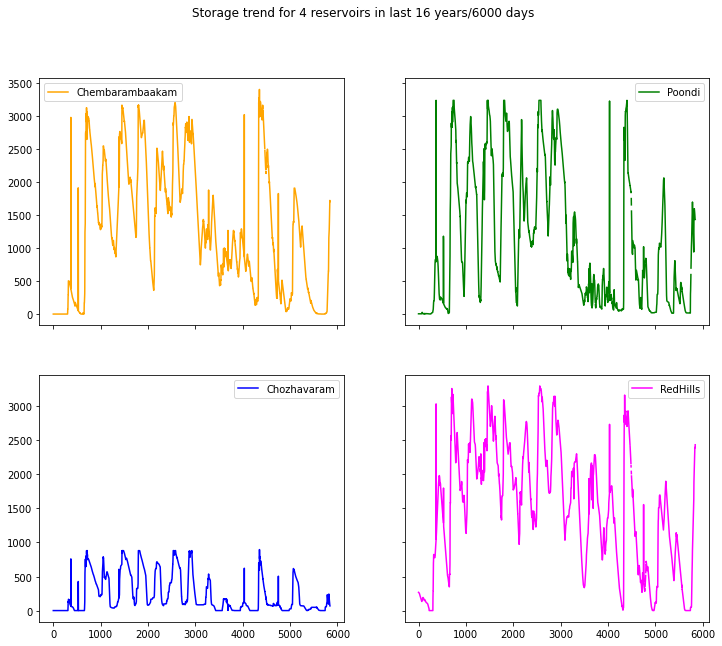

In [5]:
fig,ax=plt.subplots(2,2,figsize=(12,10),sharex='col', sharey='row')
ax[0,0].plot(dianna[0]['Storage (mcft)'],color='orange',label=revdict[0])
ax[0,0].legend()
ax[0,1].plot(dianna[2]['Storage (mcft)'],color='g',label=revdict[2])
ax[0,1].legend()
ax[1,0].plot(dianna[1]['Storage (mcft)'],color='blue',label=revdict[1])
ax[1,0].legend()
ax[1,1].plot(dianna[3]['Storage (mcft)'],color='magenta',label=revdict[3])
ax[1,1].legend()

fig.suptitle('Storage trend for 4 reservoirs in last 16 years/6000 days')
fig.show()

#### Inference:
- Each reservoir follows its own storage-level trend, demanding the need for separate intelligence models for each reservoir
- All reservoirs follow a common trend of rise-fall-rise through 1000 days

### 1.3 Goal: **Yearly performance of Water-level storage** 

Storage trend in Chembarambaakam


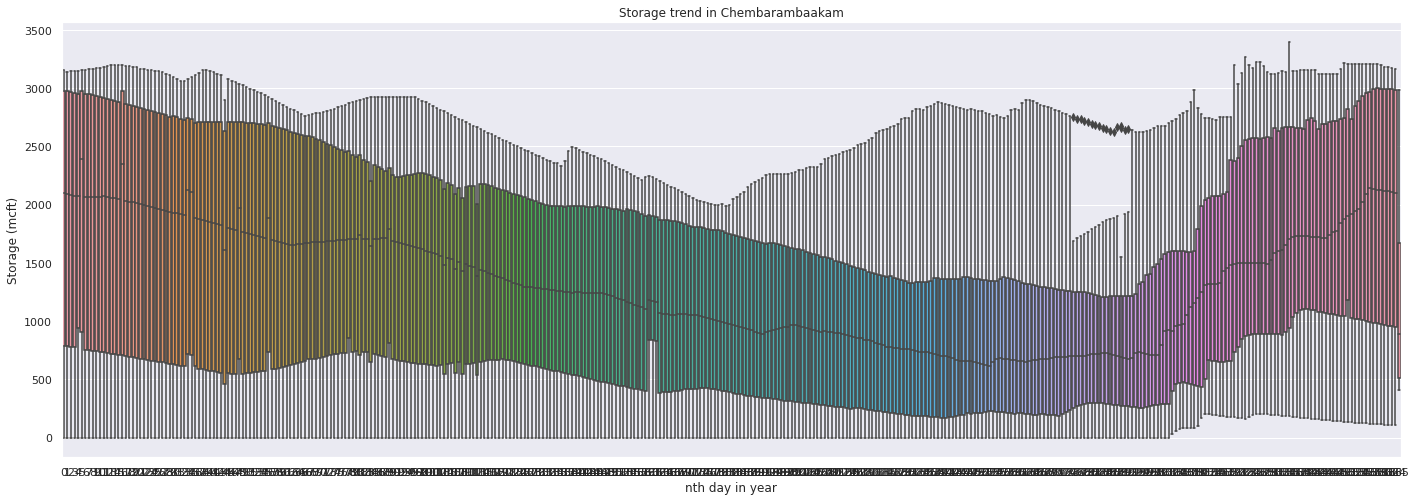

Storage trend in Chozhavaram


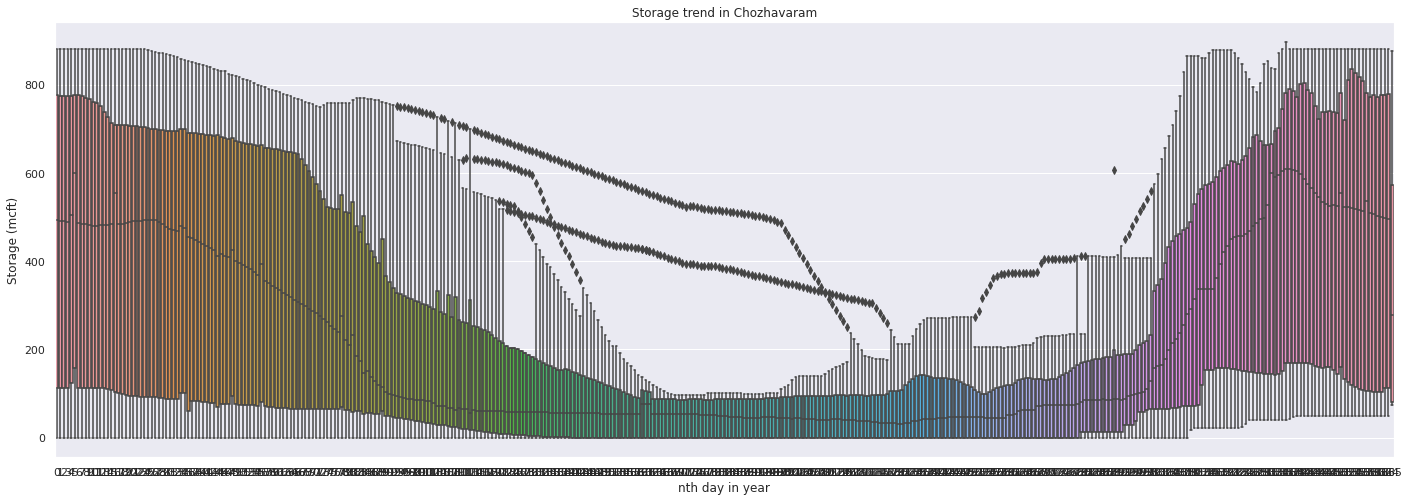

Storage trend in Poondi


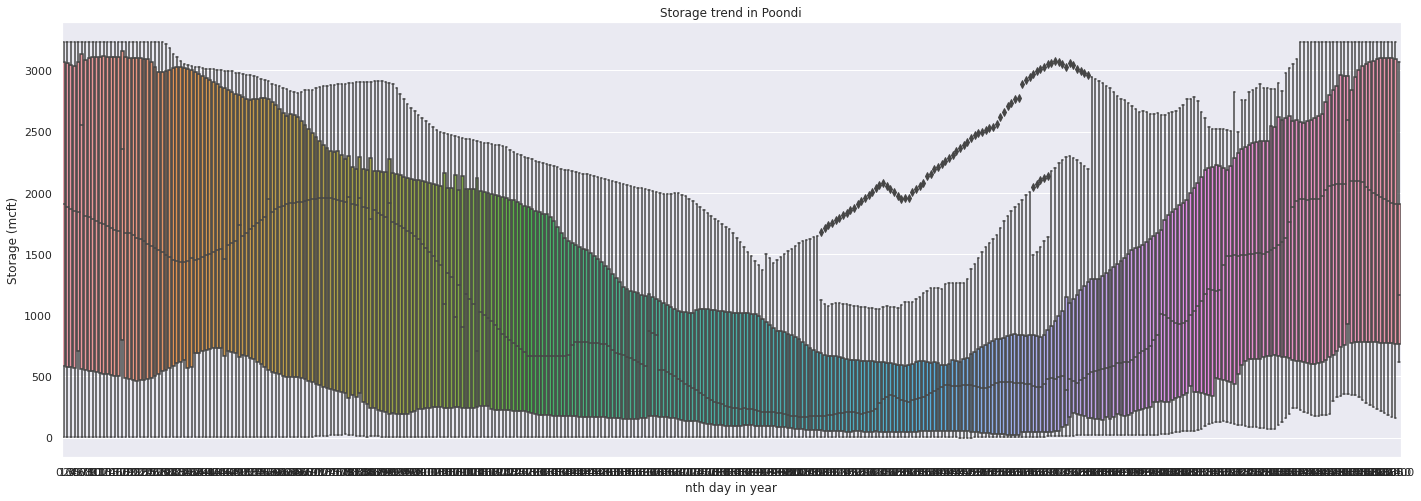

Storage trend in RedHills


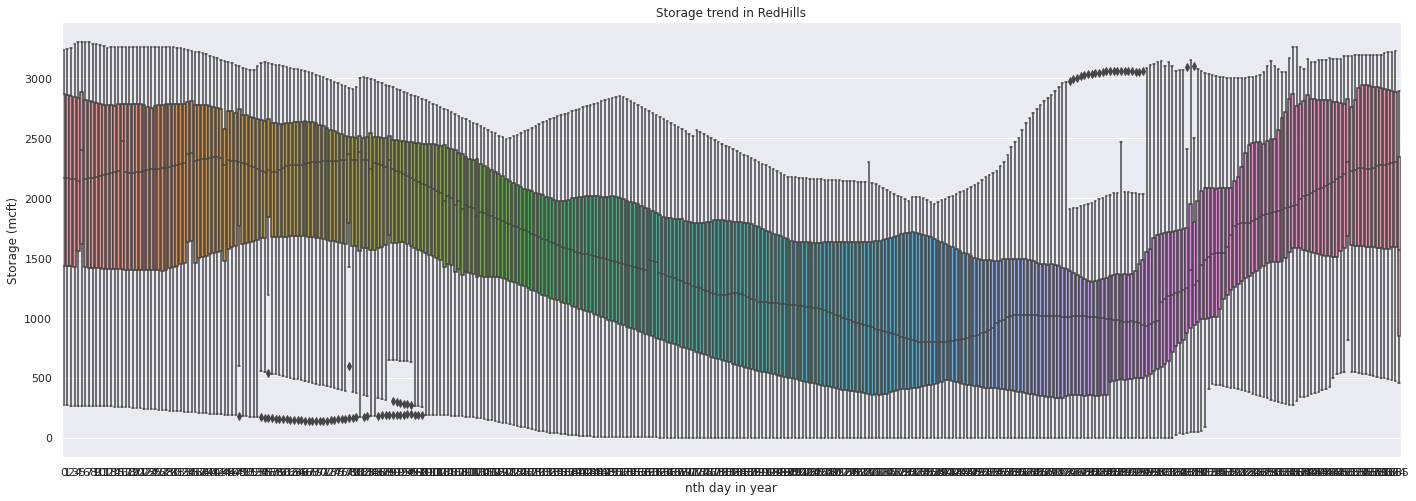

In [6]:
for i in range(4):
  sns.set(rc={'figure.figsize':(24,8)})
  print("Storage trend in "+revdict[i])
  sns.boxplot(x="nth day in year", y="Storage (mcft)", data=dianna[i]).set_title("Storage trend in "+revdict[i])
  plt.show()

#### Inference:
- Each reservoir performs differently with respect to min-max of water level
- There's a common trend of high-water-level from Dec-Feb and low water level from April-July

## **STEP TWO**: Data Cleaning
-------


Since we only deal with numbers, the data cleaning is null treatment. For simplicity reasons, we remove null values

In [3]:
print('data cleaning')
for i in range(0,4):
    print('\n',revdict[i],' Null removal:\n')
    print(dianna[i].isnull().sum())
    dianna[i]=dianna[i].dropna().reset_index(drop=True)

data cleaning

 Chembarambaakam  Null removal:

Date                 0
nth day in year      0
Storage (mcft)      14
Inflow (cusecs)     14
Rainfall (mm)       14
Outflow (cusecs)    28
dtype: int64

 Chozhavaram  Null removal:

Date                 0
nth day in year      0
Storage (mcft)      14
Inflow (cusecs)     14
Rainfall (mm)       14
Outflow (cusecs)    18
dtype: int64

 Poondi  Null removal:

Date                 0
nth day in year      1
Storage (mcft)      15
Inflow (cusecs)     15
Rainfall (mm)       15
Outflow (cusecs)    29
dtype: int64

 RedHills  Null removal:

Date                 0
nth day in year      0
Storage (mcft)      14
Inflow (cusecs)     20
Rainfall (mm)       14
Outflow (cusecs)    28
dtype: int64


## **STEP THREE**: Feature engineering
-------


Our primary goal here is to convert a table of Storage-Inflow-Outflow-Rainfall to `sequence` of `LOOKBACK` dates that `target` the `LOOKFRONT` date as shown below:

> 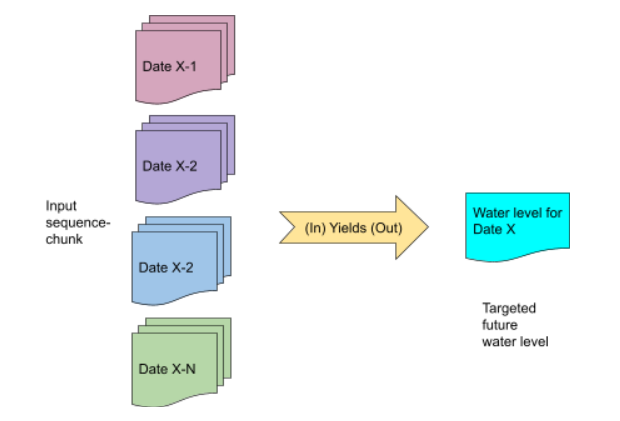

For example, you can consider this sequence:
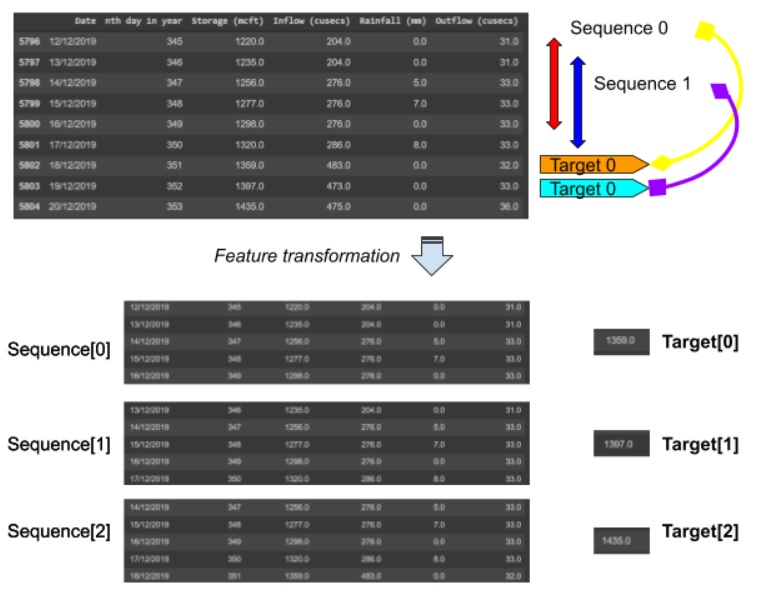
- Normalise dataset using min-max normalisation
- Sequence-transform data
- take only `TOTAL_DATES` for each dataset to ensure parallel training of model

In [10]:
dianna[0].tail(20)

,Date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
5796,12/12/2019,345,1220.0,204.0,0.0,31.0
5797,13/12/2019,346,1235.0,204.0,0.0,31.0
5798,14/12/2019,347,1256.0,276.0,5.0,33.0
5799,15/12/2019,348,1277.0,276.0,7.0,33.0
5800,16/12/2019,349,1298.0,276.0,0.0,33.0
5801,17/12/2019,350,1320.0,286.0,8.0,33.0
5802,18/12/2019,351,1359.0,483.0,0.0,32.0
5803,19/12/2019,352,1397.0,473.0,0.0,33.0
5804,20/12/2019,353,1435.0,475.0,0.0,36.0
5805,21/12/2019,354,1473.0,473.0,0.0,33.0


In [11]:
LOOKBACK=14
LOOKFRONT=7

In [12]:
#MIN-MAX NORMALISATION
def normaliser(data,ij):
                              siro=data.drop(columns=['Date'])
                              for i in siro.columns:
                                siro[i]-=min(dianna[ij][i])
                                siro[i]/=(max(dianna[ij][i])-min(dianna[ij][i]))
                              return siro
  

#N-DAY SEQUENCE FOR NEURAL NET
def sequence_prepare(raw,lookback=5,lookfront=1):
                                          sequence=np.zeros(((len(raw)-lookback),lookback,raw.shape[-1]))
                                          target=np.zeros(len(raw)-lookback)

                                          for i in range(lookback, len(raw)-lookfront):
                                              for j in range(0,lookback):
                                                  sequence[i-lookback][j]=raw.loc[i+j-lookback,:]
                                              target[i-lookback]=raw['Storage (mcft)'][i+lookfront]

                                          return sequence,target

def op_re_normaliser(var,ij):
              var*=(max(dianna[ij]['Storage (mcft)'])-min(dianna[ij]['Storage (mcft)']))
              var+=min(dianna[ij]['Storage (mcft)'])
              return var
            

siro=[]
sequence=[]
target=[]

for i in range(0,4):
    print(revdict[i])
    siro.append(normaliser(dianna[i],i))
    print(siro[i].describe())

    sequ,targ=sequence_prepare(siro[i],LOOKBACK,LOOKFRONT)
    sequence.append(sequ)
    target.append(targ)  

TOTAL_DATES=5810-LOOKBACK

for i in range(0,4):
     sequence[i]=sequence[i][:TOTAL_DATES]
     target[i]=target[i][:TOTAL_DATES]
     
     print(sequence[i].shape,
        target[i].shape)

Chembarambaakam
       nth day in year  Storage (mcft)  ...  Rainfall (mm)  Outflow (cusecs)
count      5816.000000     5816.000000  ...    5816.000000       5816.000000
mean          0.498997        0.378998  ...       0.008421          0.003948
std           0.288959        0.284045  ...       0.034169          0.020659
min           0.000000        0.000000  ...       0.000000          0.000000
25%           0.249315        0.120141  ...       0.000000          0.001207
50%           0.498630        0.351296  ...       0.000000          0.002690
75%           0.750685        0.602768  ...       0.000000          0.004034
max           1.000000        1.000000  ...       1.000000          1.000000

[8 rows x 5 columns]
Chozhavaram
       nth day in year  Storage (mcft)  ...  Rainfall (mm)  Outflow (cusecs)
count      5826.000000     5826.000000  ...    5826.000000       5826.000000
mean          0.499287        0.261594  ...       0.012861          0.021030
std           0.288760    

## **STEP FOUR**: Brain Building
-------

Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. Non-stationary data are called the data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time.

> **The problem statement given to us is a time-series prediction problem, and we need to build proper prediction models**

### **PIPELINE ZERO**: Standard Linear Regression

We will use this as a baseline model to assess overall model performance. 

> **Model ARCHITECTURE**:


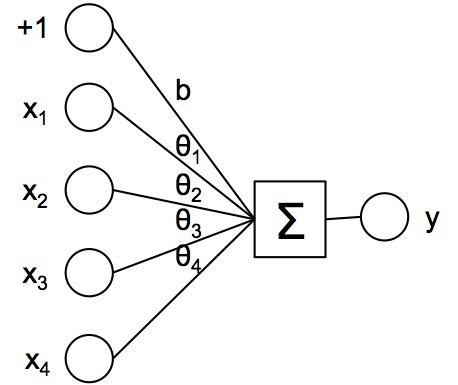
#### Advantage:
- Very simple model architecture
- Very simple to train


#### Disadvantage:
- Performs worstly

In [18]:
from sklearn import linear_model
sequence_flat=[]
for seq in sequence:
  seq_flatten=[]
  for date in seq:
    seq_flatten.append(date[-1])
  sequence_flat.append(seq_flatten)

reg = linear_model.Ridge(alpha=.5)
reg.fit(sequence_flat[0],target[0])

reg.coef_,reg.intercept_

(array([ 0.03702234,  0.98437635,  0.54099501,  0.1857428 , -0.65402909]),
 -0.013429287171665305)

### **PIPELINE ONE**: LSTM network

`Long short-term memory` (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (e.g. images), but also entire sequences of data.


#### **Why LSTM for this problem?**
>*LSTM models are able to store information over a period of time.
In order words, they have a memory capacity.*

This characteristic is extremely useful when we deal with Time-Series or Sequential Data. When using an LSTM model we are free and able to decide what information will be stored and what discarded. We do that using the “gates”. This technique has also been predominantly used in its primitive forms in the [following paper](https://www.sciencedirect.com/science/article/abs/pii/S0022169414004739)

In [ ]:


#model.add(layers.Reshape((1,5,4)))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Flatten())`

xin=[]
lstm=[]
xout=[]
for i in range(0,4):
    xin.append(layers.Input(shape=(LOOKBACK,5),name=('Input'+str(i))))
    lstm.append(layers.LSTM(16,
                            dropout=0.1,
                            recurrent_dropout=0.5,
                            activation='relu',
                            #return_sequences=True,
                            #input_shape=(5,4)
                         name=('LSTM'+str(i)))(xin[i]))
    xout.append(layers.Dense(1,name=('out'+str(i)))(lstm[i]))

                
model=models.Model(inputs=xin,outputs=xout)
model.compile(loss='mae', optimizer=optimizers.Adam())
model.summary()

print('all done')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input1 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input3 (InputLayer)             [(None, 14, 5)]      0                                            
______________________________________________________________________________________________

In [ ]:
fold=0
history=[]
for train_index, test_index in KFold(3,shuffle=True).split(sequence[0]):
    print(' Fold ',fold+1)
    x_train=[]
    x_val=[]
    y_train=[]
    y_val=[]
    for i in range(0,4):
      x_train.append(sequence[i][train_index])
      x_val.append(sequence[i][test_index])
      y_train.append(target[i][train_index])
      y_val.append(target[i][test_index])
    history.append(model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=500, 
                    validation_data=(x_val, y_val)))

 Fold  1
Epoch 1/100
8/8 [==============================] - 15s 469ms/step - loss: 1.3275 - out0_loss: 0.3649 - out1_loss: 0.3552 - out2_loss: 0.2363 - out3_loss: 0.3711 - val_loss: 1.2073 - val_out0_loss: 0.3095 - val_out1_loss: 0.3275 - val_out2_loss: 0.2084 - val_out3_loss: 0.3619
Epoch 2/100
8/8 [==============================] - 3s 321ms/step - loss: 1.0871 - out0_loss: 0.2879 - out1_loss: 0.2959 - out2_loss: 0.1927 - out3_loss: 0.3106 - val_loss: 0.9918 - val_out0_loss: 0.2427 - val_out1_loss: 0.2751 - val_out2_loss: 0.1780 - val_out3_loss: 0.2959
Epoch 3/100
8/8 [==============================] - 3s 316ms/step - loss: 0.8865 - out0_loss: 0.2284 - out1_loss: 0.2431 - out2_loss: 0.1681 - out3_loss: 0.2469 - val_loss: 0.8005 - val_out0_loss: 0.1909 - val_out1_loss: 0.2273 - val_out2_loss: 0.1572 - val_out3_loss: 0.2251
Epoch 4/100
8/8 [==============================] - 3s 328ms/step - loss: 0.7282 - out0_loss: 0.1823 - out1_loss: 0.1938 - out2_loss: 0.1465 - out3_loss: 0.2056 - val

In [ ]:

fig, axes = plt.subplots(3, 4, figsize=(18,12))
for fold in range(0,3):
  for ij in range(0,4):

    axes[fold][ij].plot(history[fold].history['out'+str(ij)+'_loss'])
    axes[fold][ij].plot(history[fold].history['val_out'+str(ij)+'_loss'])
    axes[fold][ij].set_title(revdict[ij]+' Fold '+str(fold+1)+' model loss')
    axes[fold][ij].set_ylabel('loss') 
    axes[fold][ij].set_xlabel('epoch')
    
    axes[fold][ij].legend(['train', 'test'], loc='upper right')
fig.show()


### PIPELINE TWO: **FaceBook Prophet**



Prophet is an open-source forecasting procedure implemented in R and Python. It is fast and provides completely automated forecasts that can be tuned by hand by data scientists and analysts.

> #### **Why FB-Prophet?**
It  uses  a  decomposable  time  series  model  with  three  mainmodel components:  trend, seasonality, and holidays.  They are combined in the following equation:
>> *`y(t) = g(t) +s(t) +h(t) + e`*

>Here *`g(t)`* is the `trend` function which models non-periodic changes in the value of the time  series, *`s(t)`*  represents  `periodic  changes`  (e.g.,  weekly  and  yearly  seasonality),  and *`h(t)`* represents the `effects of holidays` which occur on potentially irregular schedules overone or more days. The error term *`e`* represents any `idiosyncratic changes`

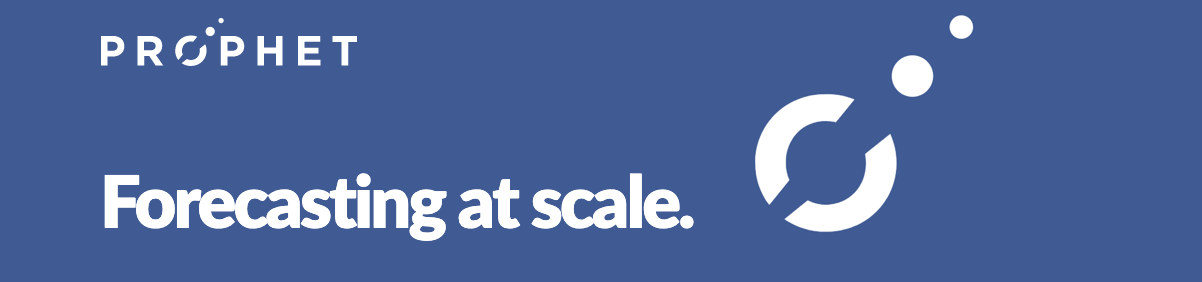
We have gone with Prophet to use its time-series prediction accuracy based on the following [research paper](https://ieeexplore.ieee.org/document/8848223) and from ARIMA vs FB-P of [stock-market price prediction](https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5)

#### **Advantages:**
- Well adapts to dates, seasons and periodic fluctuations (useful for repeating trends)
- Understands seasonal trend, outlier errors and heavy-rain fluctuations

#### **Disadvantages:**
- Does not take rainfal, inflow and outflow into account
- Might create noise if extrapolated without adequate data

**NOTE**: We used just date and storage columns and not sequence-target pairs because FB-Prophet only needs date (`ds`) and storage level in future (`y`) to forecast predicted levels (`yhat`)

In [39]:
from fbprophet import Prophet
prophet_model=[]
for i in range(4):
  m = Prophet(daily_seasonality = True)
  ds=dianna[i].loc[:,['Date','Storage (mcft)']].rename(columns={"Date":"ds","Storage (mcft)":"y"})
  ds.ds=ds.ds.apply(lambda x: "-".join(x.split("/")[::-1]))
  m.fit(ds)
  prophet_model.append(m)

In [38]:

forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()


,ds,yhat
6176,2020-12-26,344.938312
6177,2020-12-27,340.332083
6178,2020-12-28,337.216022
6179,2020-12-29,334.997107
6180,2020-12-30,333.635958


### **PIPELINE THREE**: CNN network

> A convolution can be thought of a ‘weighted sum of memories’ or echoes. A 1-d convolutional takes an input vector `x` and a filter `w` and that gives one node of the convolutional layer. Pooling involves chunking a vector into non-overlapping equal sized groups or `pools`, and then taking a summary statistic for each group. This further smooths out noise in local dynamics (refer image for working)
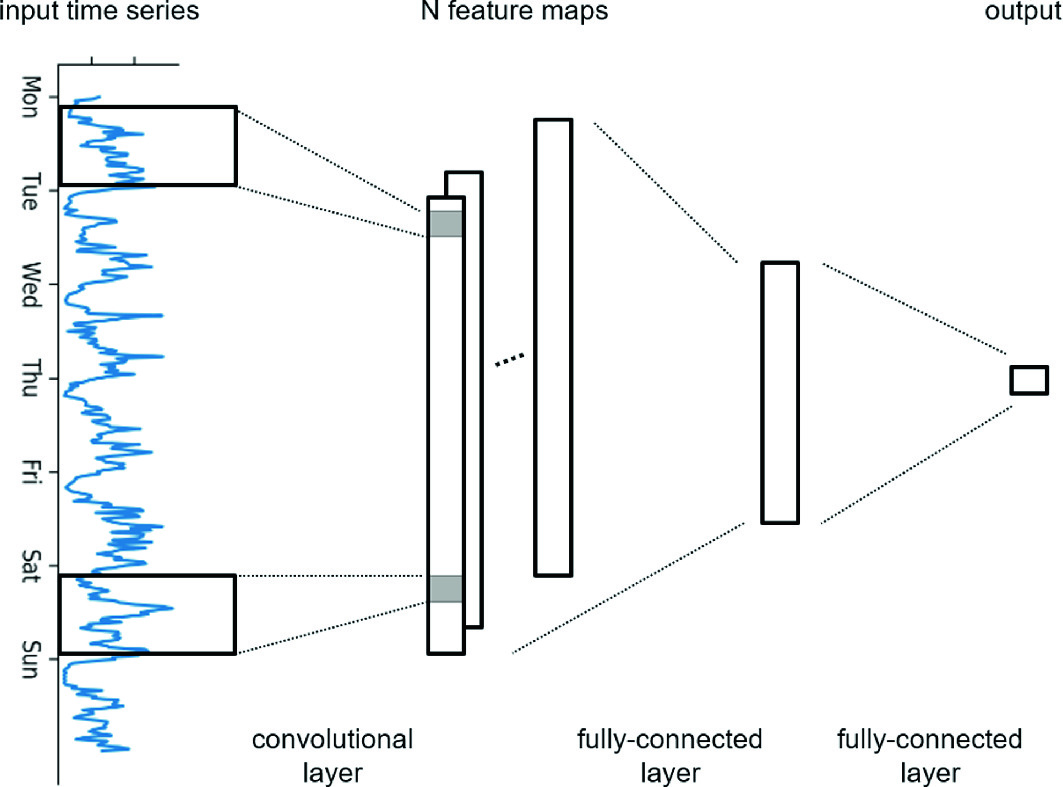
Here, the convolution kernels always have the same width as the time series, but their sliding-length can be varied. This way, the kernel moves in one direction from the beginning of a time series towards its end, performing convolution. The filters are pooled using average-pooling to further choose the best features

#### Advantages:
- Sliding window across two weeks in the given problem will be able to properly understand the dynamics of weather change in Chennai.

#### Disadvantages:
- Training is slow and exhausting
- Prone to time-based-bias (partiality due to linear time progress)

In [41]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers

#model.add(layers.Reshape((1,5,4)))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Flatten())`

xin=[]
cnnraw=[]
cnn=[]
xout=[]
for i in range(0,4):
    xin.append(layers.Input(shape=(LOOKBACK,5),name=('Input'+str(i))))
    cnnraw.append(layers.Conv1D(4,5,activation='relu',name=('CNN-base'+str(i)))(xin[i]))
    cnn.append(layers.AveragePooling1D(name=('CNN'+str(i)))(cnnraw[i]))
    xout.append(layers.Dense(1,name=('out'+str(i)))(cnn[i]))


                
model2=models.Model(inputs=xin,outputs=xout)
model2.compile(loss='mae', optimizer=optimizers.Adam())
model2.summary()

print('all done')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input1 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input3 (InputLayer)             [(None, 14, 5)]      0                                            
____________________________________________________________________________________________

In [42]:
fold=0
history=[]
for train_index, test_index in KFold(3,shuffle=False).split(sequence[0]):
    print(' Fold ',fold+1)
    x_train=[]
    x_val=[]
    y_train=[]
    y_val=[]
    for i in range(0,4):
      x_train.append(sequence[i][train_index])
      x_val.append(sequence[i][test_index])
      y_train.append(target[i][train_index])
      y_val.append(target[i][test_index])
    history.append(model2.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=500, 
                    validation_data=(x_val, y_val)))

 Fold  1
Epoch 1/100
8/8 [==============================] - 2s 72ms/step - loss: 2.0205 - out0_loss: 0.2246 - out1_loss: 0.9408 - out2_loss: 0.2828 - out3_loss: 0.5723 - val_loss: 2.3110 - val_out0_loss: 0.2650 - val_out1_loss: 1.0105 - val_out2_loss: 0.3664 - val_out3_loss: 0.6692
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 1.8768 - out0_loss: 0.2012 - out1_loss: 0.8737 - out2_loss: 0.2576 - out3_loss: 0.5443 - val_loss: 2.1608 - val_out0_loss: 0.2360 - val_out1_loss: 0.9428 - val_out2_loss: 0.3413 - val_out3_loss: 0.6407
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 1.7401 - out0_loss: 0.1799 - out1_loss: 0.8094 - out2_loss: 0.2353 - out3_loss: 0.5155 - val_loss: 2.0212 - val_out0_loss: 0.2135 - val_out1_loss: 0.8788 - val_out2_loss: 0.3166 - val_out3_loss: 0.6123
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 1.6098 - out0_loss: 0.1601 - out1_loss: 0.7480 - out2_loss: 0.2148 - out3_loss: 0.4870 - val_loss

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 4, figsize=(18,12))
for fold in range(0,3):
  for ij in range(0,4):

    axes[fold][ij].plot(history[fold].history['out'+str(ij)+'_loss'])
    axes[fold][ij].plot(history[fold].history['val_out'+str(ij)+'_loss'])
    axes[fold][ij].set_title(revdict[ij]+' Fold '+str(fold+1)+' model loss')
    axes[fold][ij].set_ylabel('loss') 
    axes[fold][ij].set_xlabel('epoch')
    
    axes[fold][ij].legend(['train', 'test'], loc='upper right')
fig.show()


### **PIPELINE FOUR**: Parallel Ensembling



**Core idea**: Merging LSTM and CNN to make a highly powerful ensembled model.

*-- Work in progress, due CAT2 --*

### **PIPELINE FIVE**: Reinforcement Learning



**Core idea**: Building an agent that can manipulate storage in order to optimise water level in Chennai.

*-- Work in progress, due CAT2 --*

## **STEP 5**: Model shortlisting

Here, we visualise models of all pipelines against the performance of test data (ie, performance of model on 2021 statistics)

In [37]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
6176,2020-12-26
6177,2020-12-27
6178,2020-12-28
6179,2020-12-29
6180,2020-12-30
